Forecasting Time Frame for Extracting Biofuel from Algae

In [ ]:
!pip install tensorflow

Importing libraries required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

In [ ]:
data = pd.read_csv('/merged_algae_dataset.csv')

In [ ]:
# Display the first few rows of the dataset
data.head()

,Tracking.ID,Analytical.Sample.ID,DATETIME,FAME.Lipids.AF,Protein.AF,Carbohydrates.AF,Temp (C),pH,Depth.cm,Duration.days,ExperimentID,SiteID,StrainID,SourceID,BatchID,PondID,time (d)
0,1607,GT_042215_3,4/22/2015 8:00,26.83,3.41,4.99,27.2,8.06,6.25,2.00,MAR122015,GT,LRB-AZ-1201,Crashed 1201_04202015_Pond 3,Crashed 1201_04202015_Pond,P3,7.937500
1,1605,GT_042215_1,4/22/2015 8:00,26.93,3.41,5.04,27.4,8.20,6.25,2.00,MAR122015,GT,LRB-AZ-1201,Crashed 1201_04202015_Pond 1,Crashed 1201_04202015_Pond,P1,7.937500
2,1606,GT_042215_2,4/22/2015 8:00,26.95,3.45,5.07,27.7,7.51,6.25,2.00,MAR122015,GT,LRB-AZ-1201,Crashed 1201_04202015_Pond 2,Crashed 1201_04202015_Pond,P2,7.937500
3,1712,FAPond5_03182015,3/18/2015 8:00,26.96,3.45,5.10,28.1,7.58,6.25,4.65,MAR122015,FA,LRB-AZ-1201,LRB_03132015_Pooled,LRB_03132015_Pond,P5,8.583333
4,1710,FAPond3_03182015,3/18/2015 8:00,26.98,3.47,5.10,28.2,7.65,6.25,4.65,MAR122015,FA,LRB-AZ-1201,LRB_03132015_Pooled,LRB_03132015_Pond,P3,8.635417


In [ ]:
# Get a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tracking.ID           2149 non-null   int64  
 1   Analytical.Sample.ID  2149 non-null   object 
 2   DATETIME              2149 non-null   object 
 3   FAME.Lipids.AF        1824 non-null   object 
 4   Protein.AF            1907 non-null   float64
 5   Carbohydrates.AF      1923 non-null   float64
 6   Temp (C)              2149 non-null   float64
 7   pH                    2149 non-null   float64
 8   Depth.cm              1777 non-null   float64
 9   Duration.days         2149 non-null   float64
 10  ExperimentID          2149 non-null   object 
 11  SiteID                2149 non-null   object 
 12  StrainID              2149 non-null   object 
 13  SourceID              2125 non-null   object 
 14  BatchID               2148 non-null   object 
 15  PondID               

In [ ]:
data.describe()

,Tracking.ID,Protein.AF,Carbohydrates.AF,Temp (C),pH,Depth.cm,Duration.days,time (d)
count,2149.000000,1907.000000,1923.000000,2149.000000,2149.000000,1777.000000,2149.000000,2149.000000
mean,1251.349465,10.880566,12.702184,24.242066,7.881857,24.551452,24.859134,25.704154
std,753.775408,4.676515,5.904802,4.109025,0.118340,1.531187,12.095508,10.785718
min,2.000000,3.410000,4.990000,14.800000,7.050000,6.250000,2.000000,7.937500
25%,618.000000,7.200000,8.510000,21.900000,7.830000,24.200000,13.900000,16.750000
50%,1206.000000,10.660000,10.940000,24.200000,7.910000,24.600000,25.700000,23.906250
75%,1835.000000,13.540000,15.355000,26.900000,7.960000,25.000000,34.040000,33.625000
max,2802.000000,33.950000,42.550000,33.000000,8.300000,30.100000,54.830000,55.885417


In [ ]:
data.shape

(2149, 17)

In [ ]:
data.isnull().sum()

Tracking.ID               0
Analytical.Sample.ID      0
DATETIME                  0
FAME.Lipids.AF          325
Protein.AF              242
Carbohydrates.AF        226
Temp (C)                  0
pH                        0
Depth.cm                372
Duration.days             0
ExperimentID              0
SiteID                    0
StrainID                  0
SourceID                 24
BatchID                   1
PondID                    0
time (d)                  0
dtype: int64

In [ ]:
data = data.dropna()
data

,Tracking.ID,Analytical.Sample.ID,DATETIME,FAME.Lipids.AF,Protein.AF,Carbohydrates.AF,Temp (C),pH,Depth.cm,Duration.days,ExperimentID,SiteID,StrainID,SourceID,BatchID,PondID,time (d)
0,1607,GT_042215_3,4/22/2015 8:00,26.83,3.41,4.99,27.2,8.06,6.25,2.00,MAR122015,GT,LRB-AZ-1201,Crashed 1201_04202015_Pond 3,Crashed 1201_04202015_Pond,P3,7.937500
1,1605,GT_042215_1,4/22/2015 8:00,26.93,3.41,5.04,27.4,8.20,6.25,2.00,MAR122015,GT,LRB-AZ-1201,Crashed 1201_04202015_Pond 1,Crashed 1201_04202015_Pond,P1,7.937500
2,1606,GT_042215_2,4/22/2015 8:00,26.95,3.45,5.07,27.7,7.51,6.25,2.00,MAR122015,GT,LRB-AZ-1201,Crashed 1201_04202015_Pond 2,Crashed 1201_04202015_Pond,P2,7.937500
3,1712,FAPond5_03182015,3/18/2015 8:00,26.96,3.45,5.10,28.1,7.58,6.25,4.65,MAR122015,FA,LRB-AZ-1201,LRB_03132015_Pooled,LRB_03132015_Pond,P5,8.583333
4,1710,FAPond3_03182015,3/18/2015 8:00,26.98,3.47,5.10,28.2,7.65,6.25,4.65,MAR122015,FA,LRB-AZ-1201,LRB_03132015_Pooled,LRB_03132015_Pond,P3,8.635417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1850,ASU_SPW18_06112015,06-11-2015 07:30,48.34,17.13,21.71,14.9,7.87,29.80,36.67,MAY052015,ASU,KA32,KA32_05052015_NO3_CRW,KA32_05052015_NO3_SPW,P5,36.812500
1773,1849,ASU_SPW17_06112015,06-11-2015 07:30,48.55,17.15,21.83,15.0,7.94,29.80,36.67,MAY052015,ASU,KA32,KA32_05052015_NO3_CRW,KA32_05052015_NO3_SPW,P4,36.812500
1774,1851,ASU_SPW19_06112015,06-11-2015 07:30,48.58,17.19,21.91,15.5,7.79,29.90,36.67,MAY052015,ASU,KA32,KA32_05052015_NO3_CRW,KA32_05052015_NO3_SPW,P6,36.812500
1775,1769,ASU_SPW15_01222015,1/22/2015 7:15,48.61,17.20,21.97,15.6,7.83,30.00,36.67,DEC162014,ASU,KA32,KA32_12032014_CRW,KA32_12162014_SPW,P7,36.822917


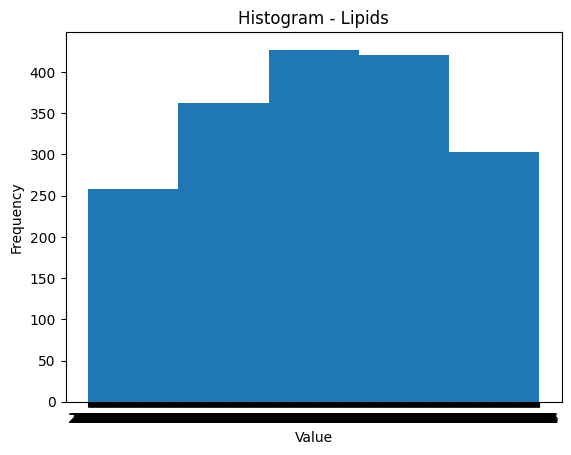

In [ ]:
plt.hist(data['FAME.Lipids.AF'], bins=5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram - Lipids')
plt.show()

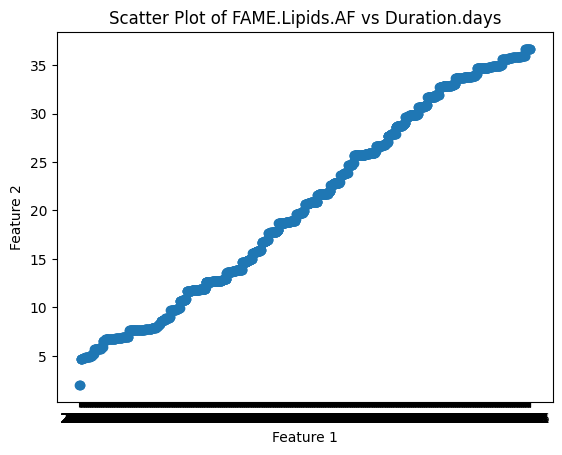

In [ ]:
plt.scatter(data['FAME.Lipids.AF'], data['Duration.days'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of FAME.Lipids.AF vs Duration.days')
plt.show()

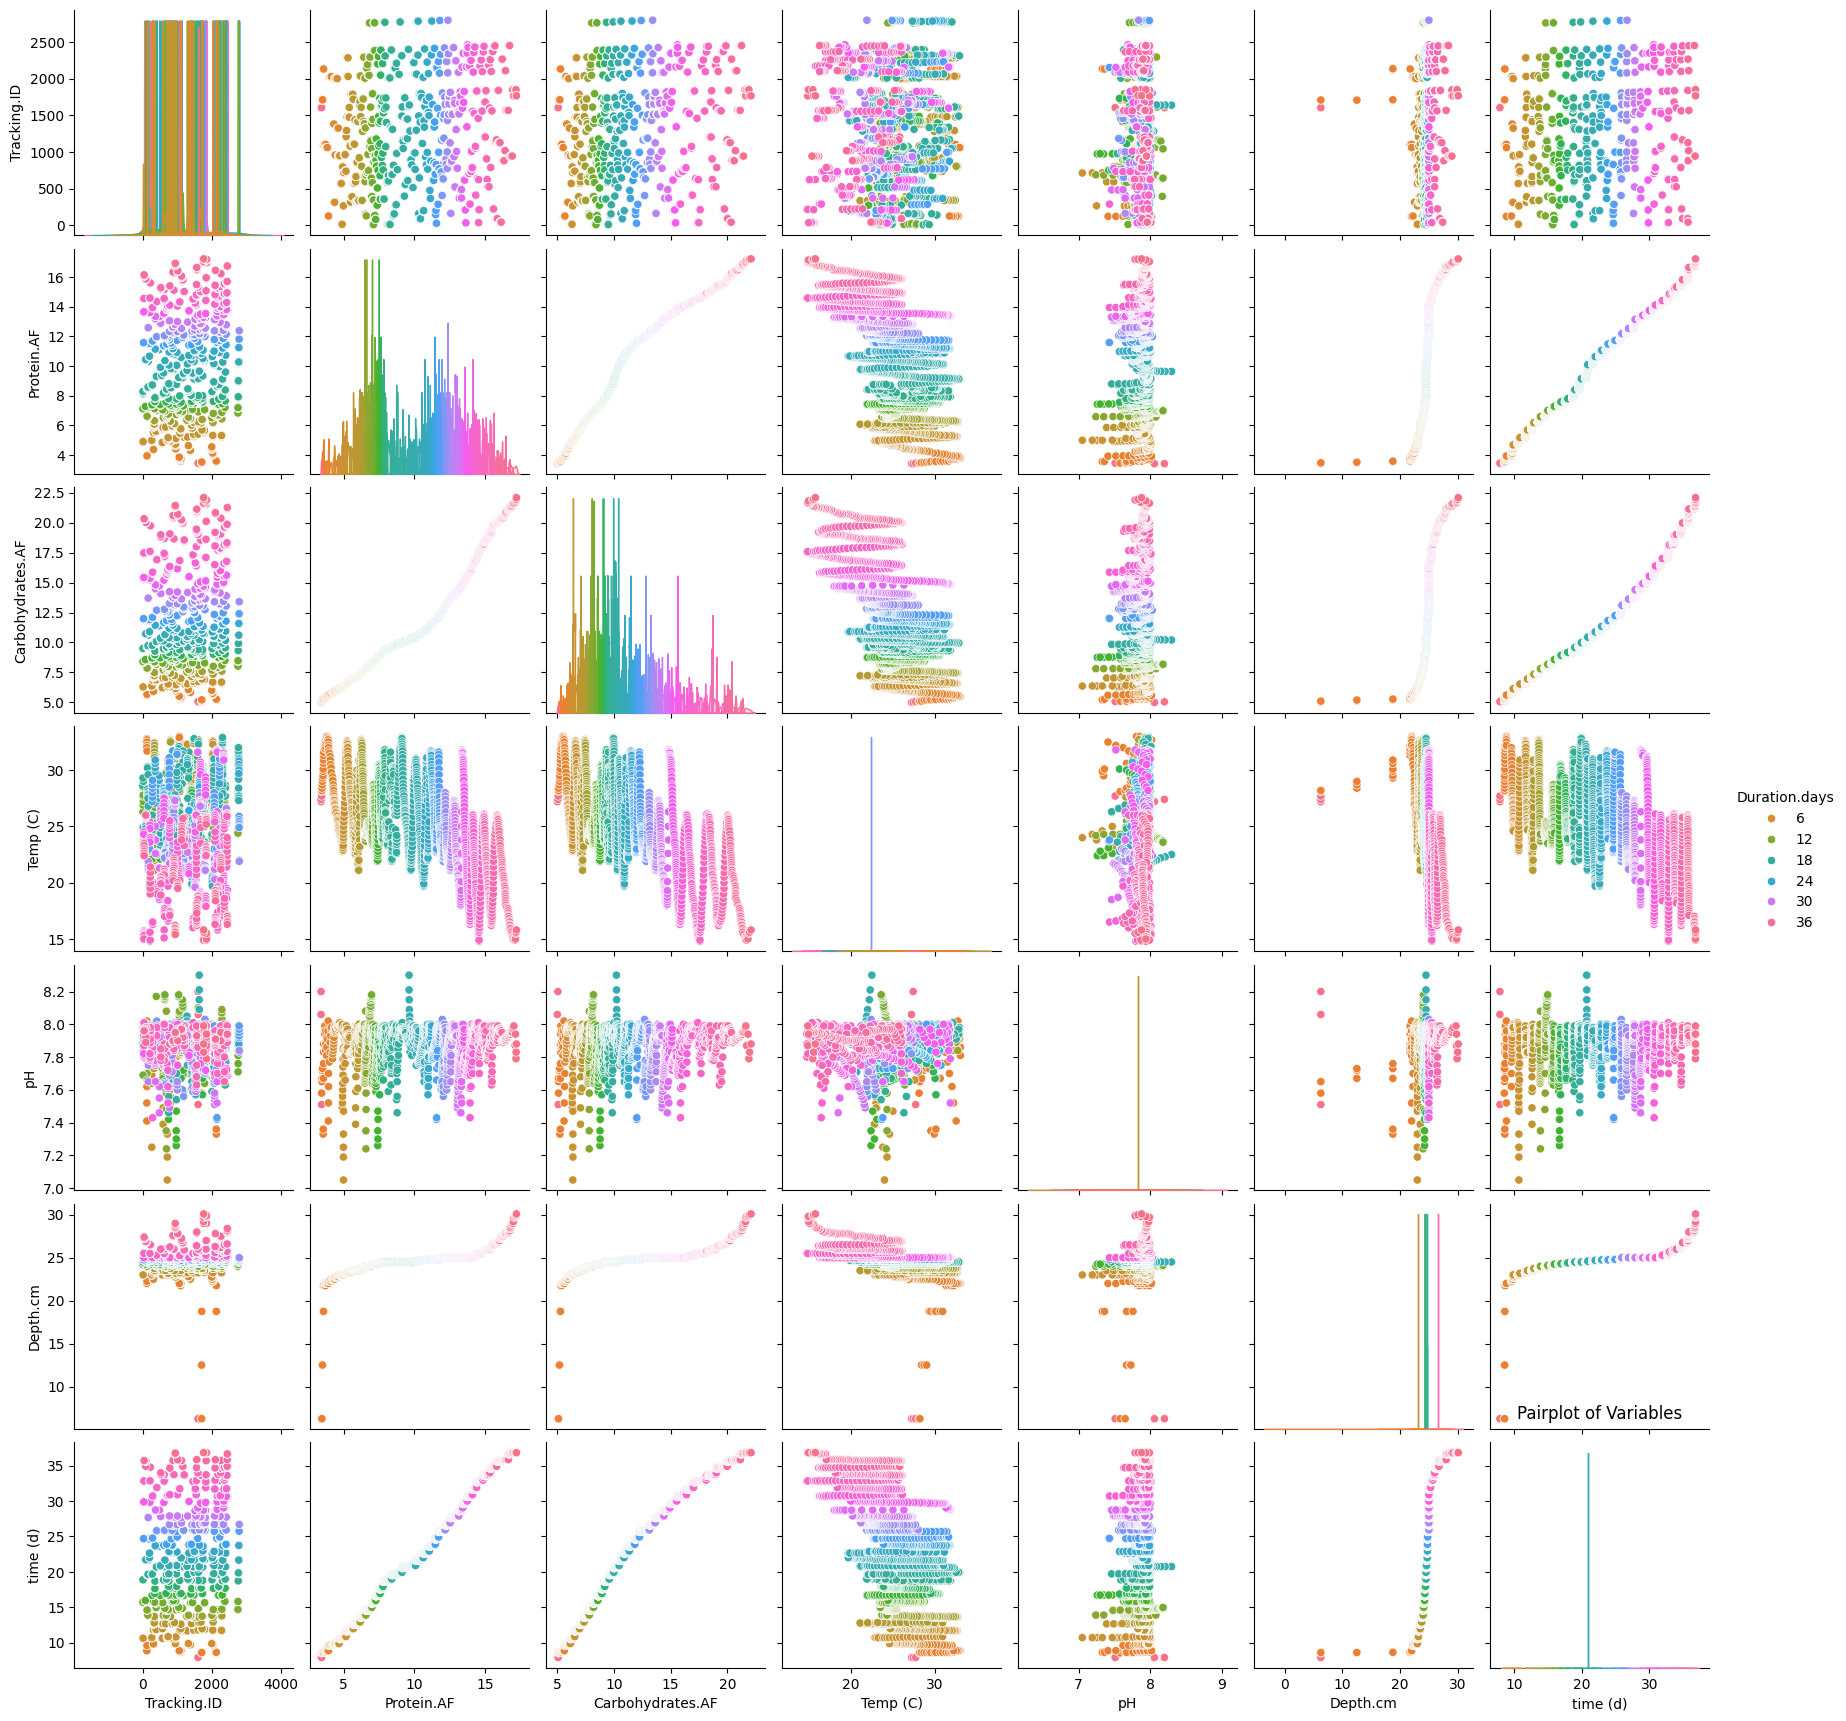

In [ ]:
sns.pairplot(data, hue='Duration.days', palette='husl')
plt.title('Pairplot of Variables')
plt.show()


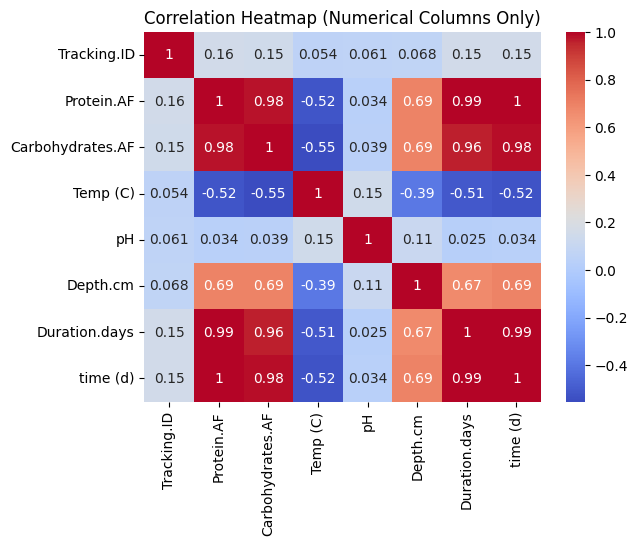

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

In [ ]:
features_ext = data.iloc[:, 3:10]

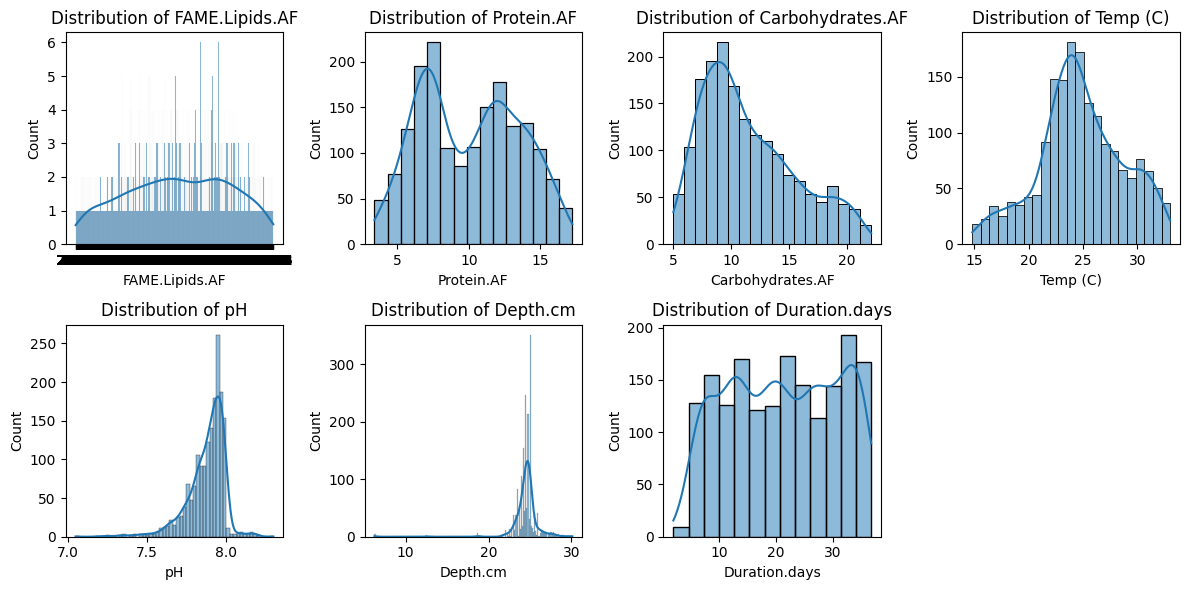

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(features_ext.columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Approaches tried:

1. Vanilla LSTM

Epoch 1/100
44/44 [==============================] - 6s 5ms/step - loss: 0.0261
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 4.8026e-04
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 3.4347e-04
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 2.5206e-04
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 1.8886e-04
Epoch 7/100
44/44 [==============================] - 0s 6ms/step - loss: 1.4398e-04
Epoch 8/100
44/44 [==============================] - 0s 5ms/step - loss: 1.1754e-04
Epoch 9/100
44/44 [==============================] - 0s 5ms/step - loss: 1.0344e-04
Epoch 10/100
44/44 [==============================] - 0s 5ms/step - loss: 9.0953e-05
Epoch 11/100
44/44 [==============================] - 0s 5ms/step - loss: 8.2424e-05
Epoch 12/100
44/44 [==============================] - 0s 5ms/step - loss: 7.3485e-

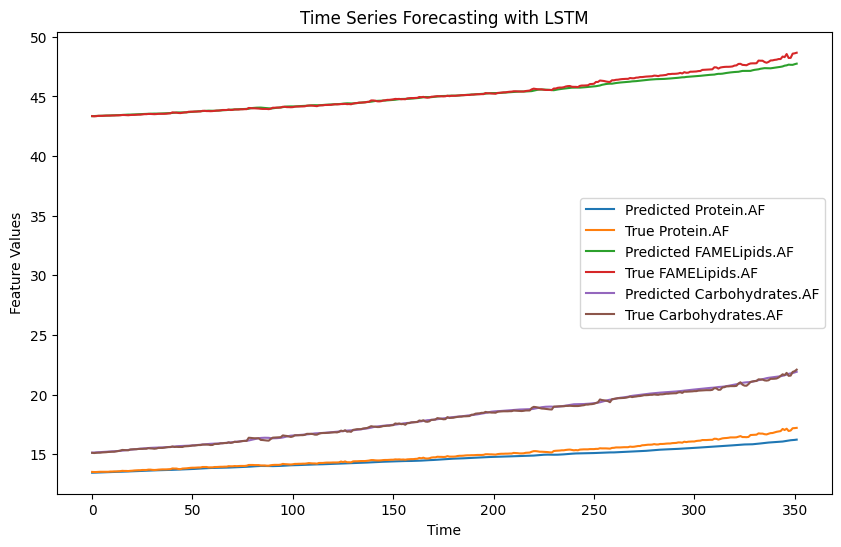

11/11 [==============================] - 1s 3ms/step - loss: 2.8544e-04
Test Loss: 0.000285442394670099


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
df = pd.read_csv('/merged_algae_dataset.csv')

df = df.dropna()

df = df.sort_values(by='time (d)')

time_series_data = df['time (d)'].values
features_to_forecast = df[['Protein.AF', 'FAME.Lipids.AF', 'Carbohydrates.AF']].values

# Normalize the features to forecast
scaler = MinMaxScaler(feature_range=(0, 1))
features_to_forecast_scaled = scaler.fit_transform(features_to_forecast)

# Define the number of time steps
n_steps = 10

# Prepare the time series data with rolling window approach
X, y = [], []
for i in range(n_steps, len(time_series_data)):
    X.append(features_to_forecast_scaled[i - n_steps:i, :])
    y.append(features_to_forecast_scaled[i, :])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=3))  # 3 output units for 3 features
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(3):  # Plot each feature separately
    plt.plot(predictions[:, i], label=f'Predicted {["Protein.AF", "FAMELipids.AF", "Carbohydrates.AF"][i]}')
    plt.plot(scaler.inverse_transform(y_test)[:, i], label=f'True {["Protein.AF", "FAMELipids.AF", "Carbohydrates.AF"][i]}')
plt.title('Time Series Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Feature Values')
plt.legend()
plt.show()


loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

**2. Multi-variate LSTM**

Epoch 1/100
36/36 [==============================] - 4s 44ms/step - loss: 219.8326 - val_loss: 511.4493
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 56.8955 - val_loss: 74.0364
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 18.4023 - val_loss: 76.9978
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 12.1930 - val_loss: 37.5354
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 6.4990 - val_loss: 13.9793
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 3.3355 - val_loss: 4.1197
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 2.1353 - val_loss: 0.2204
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 1.6255 - val_loss: 0.9117
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 1.1856 - val_loss: 0.4160
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: 1.0068 - val_loss: 0.57

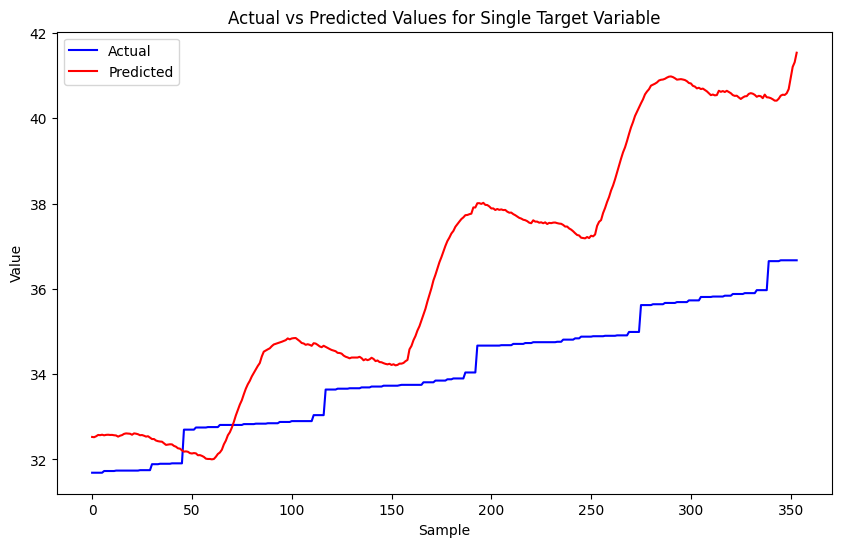

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


df = pd.read_csv('/merged_algae_dataset.csv')
df = df.dropna()

feature_columns = df.columns[3:7]

df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Extract independent variable (feature) data
X = df[feature_columns].values.reshape(-1, 1, len(feature_columns)).astype('float32')   # Convert to float32
y = df['Duration.days']

split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(10, activation='relu'),
    Dense(1)  # Output layer with one unit for each target column
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)
print("Predictions shape:", predictions.shape)

import matplotlib.pyplot as plt

# Extract actual and predicted values for the single target variable
actual_values = y_test.values.flatten()
predicted_values = predictions.flatten()

# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for Single Target Variable')
plt.legend()
plt.show()


**3. Transformer with an additional LSTM**

Epoch 1/10
36/36 [==============================] - 1s 6ms/step - loss: 251.8793 - val_loss: 208.2026
Epoch 2/10
36/36 [==============================] - 0s 3ms/step - loss: 202.1579 - val_loss: 173.4185
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 172.8797 - val_loss: 153.6325
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 156.7608 - val_loss: 143.8343
Epoch 5/10
36/36 [==============================] - 0s 3ms/step - loss: 148.0079 - val_loss: 138.4277
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 142.4314 - val_loss: 134.2953
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 137.8104 - val_loss: 130.5608
Epoch 8/10
36/36 [==============================] - 0s 2ms/step - loss: 133.6061 - val_loss: 126.7794
Epoch 9/10
36/36 [==============================] - 0s 2ms/step - loss: 129.4082 - val_loss: 123.0181
Epoch 10/10
12/12 [==============================] - 0s 1ms/step
Epoch 1/10
36/36 

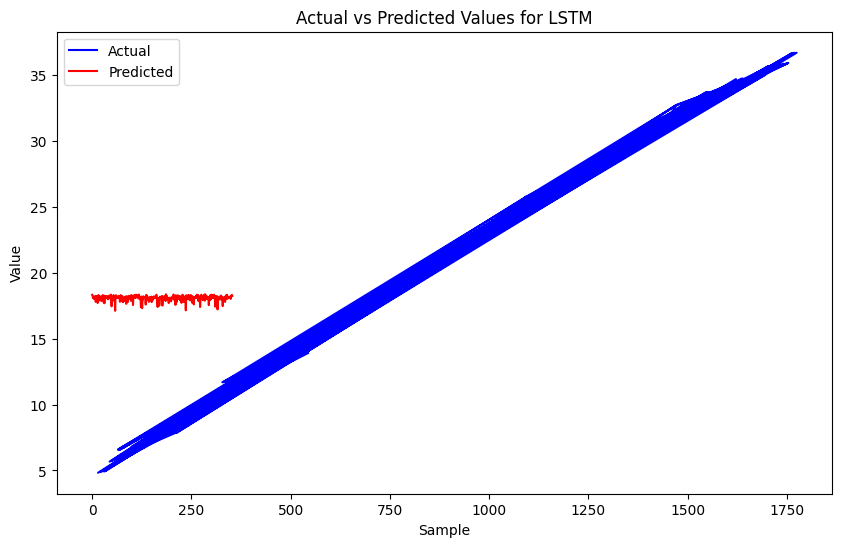

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

# Load your CSV dataset
data = pd.read_csv('/merged_algae_dataset.csv')
data = data.dropna()
feature_columns = data.columns[3:7]  # Assuming columns are 0-indexed
data[feature_columns] = data[feature_columns].apply(pd.to_numeric, errors='coerce')
features = data[feature_columns].values.reshape(-1, 1, len(feature_columns)).astype('float32')   # Convert to float32
target = data['Duration.days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the Transformer-based model
def transformer_model(input_shape):
    inputs = Input(shape=(1, input_shape))  # Modify the input shape directly
    # Define your Transformer layers here
    # For simplicity, let's assume a single dense layer
    outputs = Dense(1)(inputs)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Train the Transformer model
input_shape = X_train.shape[2]  # Extract the integer value representing the input shape's dimension
transformer = transformer_model(input_shape)
transformer.compile(optimizer='adam', loss='mean_squared_error')
transformer.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Extract features using the trained Transformer model
transformer_features_train = transformer.predict(X_train)
transformer_features_test = transformer.predict(X_test)

# Define the LSTM model
def lstm_model(input_shape):
    inputs = Input(shape=(1, input_shape))  # Modify the input shape directly
    lstm_layer = LSTM(50)(inputs)  # Add an LSTM layer with 50 units
    outputs = Dense(1)(lstm_layer)  # Output layer
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Train the LSTM model on the transformer features
lstm_input_shape = transformer_features_train.shape[1]  # Input shape for LSTM model
lstm_model = lstm_model(lstm_input_shape)
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(transformer_features_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions using the LSTM model
lstm_predictions = lstm_model.predict(transformer_features_test)

# Evaluate the LSTM model
lstm_mse = mean_squared_error(y_test, lstm_predictions)
print("LSTM Mean Squared Error:", lstm_mse)

import matplotlib.pyplot as plt

# Extract actual and predicted values for LSTM
lstm_actual_values = y_test  # Assuming y_test contains the actual values for LSTM
lstm_predicted_values = lstm_predictions  # Assuming lstm_predictions contains the predicted values for LSTM

# Plot the actual versus predicted values for LSTM
plt.figure(figsize=(10, 6))
plt.plot(lstm_actual_values, label='Actual', color='blue')
plt.plot(lstm_predicted_values, label='Predicted', color='red')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for LSTM')
plt.legend()
plt.show()


**Our Model : An LSTM based Encoder-Decoder Neural Network**

In [ ]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

df= pd.read_csv('/merged_algae_dataset.csv')
df = df.dropna()

In [ ]:
feature_columns = df.columns[3:10]  # Assuming columns are 0-indexed
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')
features = df[feature_columns].values.reshape(-1, 1, len(feature_columns)).astype('float32')   # Convert to float32

In [ ]:
features

array([[[26.83,  3.41,  4.99, ...,  8.06,  6.25,  2.  ]],

       [[26.93,  3.41,  5.04, ...,  8.2 ,  6.25,  2.  ]],

       [[26.95,  3.45,  5.07, ...,  7.51,  6.25,  2.  ]],

       ...,

       [[48.58, 17.19, 21.91, ...,  7.79, 29.9 , 36.67]],

       [[48.61, 17.2 , 21.97, ...,  7.83, 30.  , 36.67]],

       [[48.66, 17.22, 22.1 , ...,  7.88, 30.1 , 36.67]]], dtype=float32)

In [ ]:
features = df.iloc[:, 3:10].values

In [ ]:
# Define the number of input and output time steps
n_steps_in = 3
n_steps_out = 2

In [ ]:
# Function to prepare data for LSTM
def prepare_data(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Prepare the data for LSTM
X, y = prepare_data(features, n_steps_in, n_steps_out)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model = Sequential([
    # Encoder
    LSTM(128, activation='relu', input_shape=(n_steps_in, features.shape[1]), return_sequences=True),
    Dropout(0.2),  # Adding dropout for regularization
    LSTM(64, activation='relu', return_sequences=False),  # Return only the last output
    RepeatVector(n_steps_out),  # Repeat the output of the encoder for each time step

    # Decoder
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),  # Adding dropout for regularization
    TimeDistributed(Dense(features.shape[1], activation='linear'))  # Apply a dense layer to each time step output
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
45/45 [==============================] - 5s 26ms/step - loss: 179.7859 - val_loss: 62.1387
Epoch 2/100
45/45 [==============================] - 1s 15ms/step - loss: 35.1757 - val_loss: 16.8646
Epoch 3/100
45/45 [==============================] - 1s 20ms/step - loss: 22.9551 - val_loss: 16.2145
Epoch 4/100
45/45 [==============================] - 1s 22ms/step - loss: 19.0852 - val_loss: 15.2321
Epoch 5/100
45/45 [==============================] - 1s 19ms/step - loss: 16.8279 - val_loss: 16.9274
Epoch 6/100
45/45 [==============================] - 1s 12ms/step - loss: 15.3556 - val_loss: 14.1008
Epoch 7/100
45/45 [==============================] - 1s 13ms/step - loss: 12.8365 - val_loss: 8.0310
Epoch 8/100
45/45 [==============================] - 1s 13ms/step - loss: 12.1431 - val_loss: 12.5999
Epoch 9/100
45/45 [==============================] - 1s 13ms/step - loss: 10.2819 - val_loss: 11.0665
Epoch 10/100
45/45 [==============================] - 1s 13ms/step - loss: 10.2596

In [ ]:
predictions = model.predict(X)

56/56 [==============================] - 1s 4ms/step


In [ ]:
# Plot actual vs. predicted values for a specific feature
target_feature_index = 0  # Choose the index of the target feature to plot
actual_values = y[:, :, target_feature_index].flatten()
predicted_values = predictions[:, :, target_feature_index].flatten()

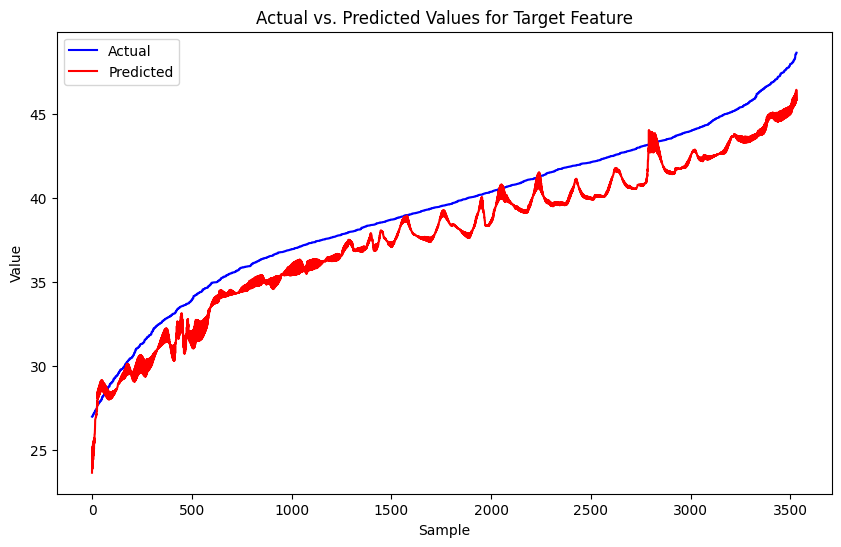

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values for Target Feature')
plt.legend()
plt.show()

In [ ]:
loss = model.evaluate(X, y)
print("Model Loss:", loss)

56/56 [==============================] - 0s 4ms/step - loss: 2.1300
Model Loss: 2.1300439834594727


In [ ]:
print("Shape of Predicted Values:", predictions.shape)

Shape of Predicted Values: (1766, 2, 7)


In [ ]:
# Get the names of the feature columns
feature_columns_names = df.columns[3:10]

# Print the predicted values for each column
for i, column_name in enumerate(feature_columns_names):
    print("Predicted values for column:", column_name)
    predicted_column_values = predictions[:, :, i]
    print(predicted_column_values)
    #predicted_column_values

Predicted values for column: FAME.Lipids.AF
[[23.615309 25.062334]
 [23.84044  25.199226]
 [24.069078 25.336811]
 ...
 [46.25614  45.687202]
 [46.373383 45.784576]
 [46.448654 45.84636 ]]
Predicted values for column: Protein.AF
[[ 4.0682683  4.06549  ]
 [ 4.130887   4.1145053]
 [ 4.289223   4.2610164]
 ...
 [14.086003  13.981063 ]
 [14.10733   13.994973 ]
 [14.134416  14.0233755]]
Predicted values for column: Carbohydrates.AF
[[ 4.669352   5.13248  ]
 [ 4.7658005  5.220243 ]
 [ 4.9167857  5.373141 ]
 ...
 [15.826858  15.243533 ]
 [15.855649  15.262824 ]
 [15.887573  15.288436 ]]
Predicted values for column: Temp (C)
[[24.054258 26.641647]
 [24.228642 26.746706]
 [24.427645 26.873299]
 ...
 [21.592485 20.625126]
 [21.650257 20.673197]
 [21.693396 20.719816]]
Predicted values for column: pH
[[6.34069   6.4925046]
 [6.3602786 6.4989753]
 [6.3824463 6.512252 ]
 ...
 [9.059677  8.333844 ]
 [9.075752  8.351016 ]
 [9.09374   8.35955  ]]
Predicted values for column: Depth.cm
[[17.140867 17.132

In [ ]:
# lipid above 20%
# protein 10% - 30%
# carbohydrate 10% - 30%
# Algal Culture Temperature 20°C to 25°C
# Algal Culture pH pH 7 to 9
# Algal Culture Depth less than 30 cm

# Get the index of the column for Duration.days
duration_index = 6

# Iterate through the predicted values
for i in range(len(predictions)):
    if (predictions[i, 0, 0] > 20 and
        10 <= predictions[i, 0, 1] <= 30 and
        10 <= predictions[i, 0, 2] <= 30 and
        20 <= predictions[i, 0, 3] <= 25 and
        7 <= predictions[i, 0, 4] <= 9 and
        predictions[i, 0, 5] < 30):


        # Print the first occurrence meeting the conditions
        print("Duration after which the algae is fit for biofuel extraction is:", predictions[i, 0, duration_index], "days.")
        break

Duration after which the algae is fit for biofuel extraction is: 21.875578 days.


In [ ]:
absolute_errors = np.abs(y.flatten() - predictions.flatten())
cmap = plt.cm.viridis

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y.flatten(), predictions.flatten())
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.1300441794420175


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.4594670874815976


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y.flatten(), predictions.flatten())
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 1.0402811778959111


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y.flatten(), predictions.flatten())
print("Coefficient of Determination (R-squared):", r2)

Coefficient of Determination (R-squared): 0.9832159521772625


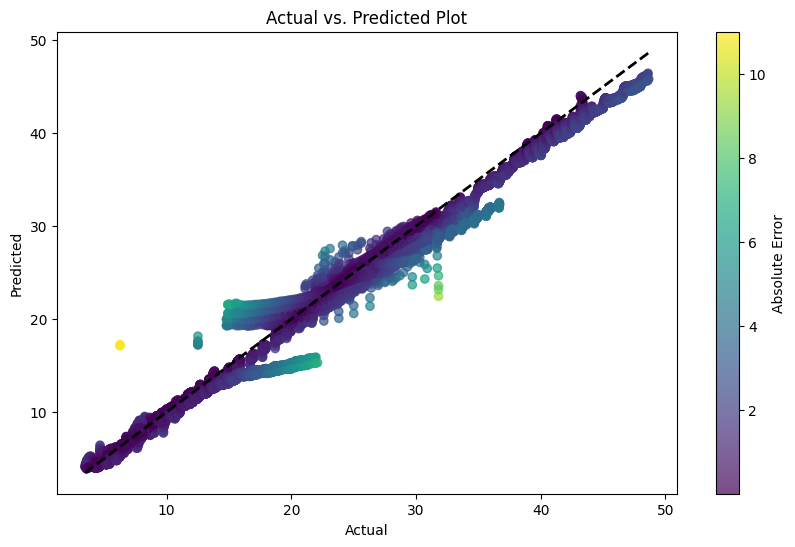

In [ ]:
# Create a scatter plot with a color gradient based on the absolute errors
plt.figure(figsize=(10, 6))
plt.scatter(y.flatten(), predictions.flatten(), c=absolute_errors, cmap=cmap, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.colorbar(label='Absolute Error')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Plot')
plt.show()


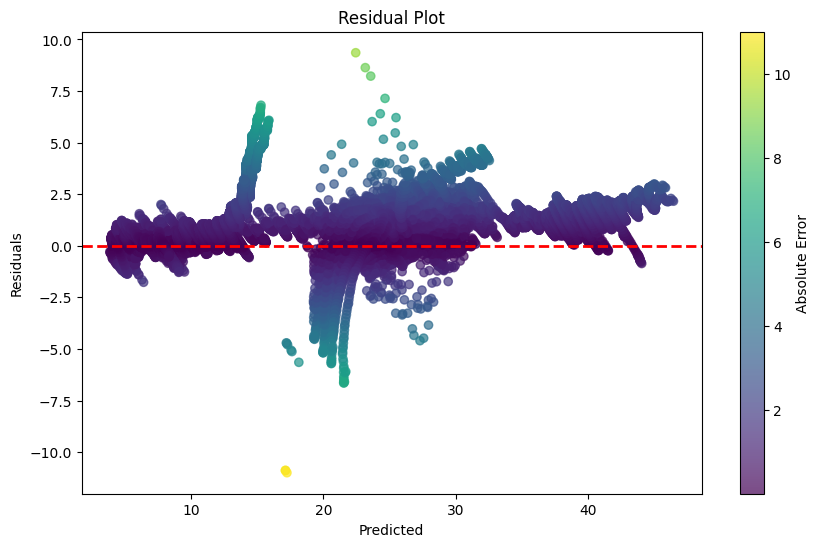

In [ ]:
# Residual Plot with Color Gradient
residuals = y.flatten() - predictions.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), residuals, c=absolute_errors, cmap=cmap, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.colorbar(label='Absolute Error')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

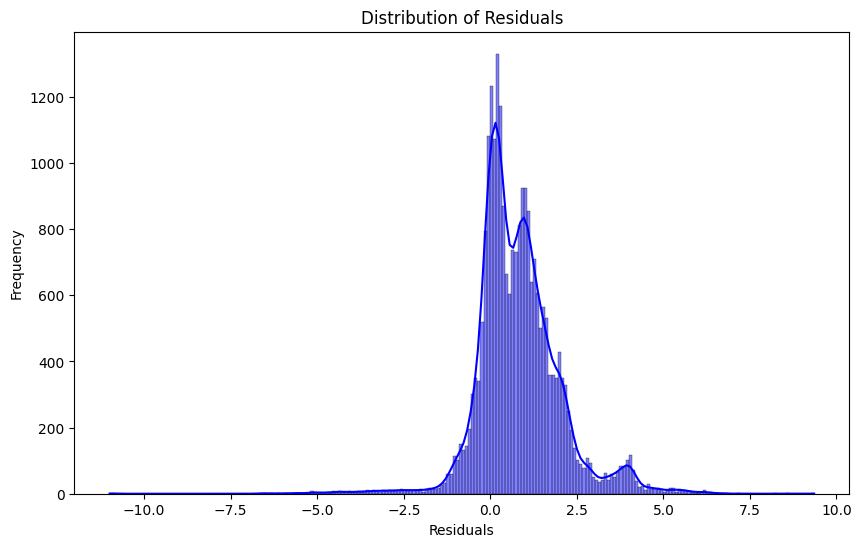

In [ ]:
#Distribution of Residuals:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()